In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
import matplotlib.pyplot as plt

## Preprocessing

In [5]:
col_names = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']

#### Train Data

In [6]:
df_train=pd.read_csv("adultdata.csv",names=col_names)
df_train

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_train.describe

<bound method NDFrame.describe of        Age          Workclass  fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital_Status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family 

In [8]:
#df_train.isnull().sum()

In [9]:
df_train = df_train.replace(to_replace = '%?%', value = np.nan)
df_train.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df_train.dtypes

Age                   int64
Workclass            object
fnlwgt                int64
Education            object
Education-num         int64
Marital_Status       object
Occupation           object
Relationship         object
Race                 object
Sex                  object
Capital-gain          int64
Capital-loss          int64
hrs_per_week          int64
Native-Country       object
Earning_potential    object
dtype: object

In [11]:
all_features = list(df_train.columns)
print(all_features)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']


In [12]:
#seperating categorical features
categorical_features = list(df_train.select_dtypes(include=['object']).columns)
print(categorical_features)

['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']


In [13]:
#seperating numerical features
numerical_features = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
print(numerical_features)

['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [14]:
#handling null values
nan_values = df_train.columns[df_train.isnull().any()]
df_train[nan_values].isnull().sum()

Series([], dtype: float64)

In [15]:
#replacing nan values with mode
for i in list(nan_values):
    df_train[i].fillna(df_train[i].mode().values[0],inplace=True)

In [16]:
df_train.isnull().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

#### Test Data

In [17]:
df_test=pd.read_csv("adulttest.csv",names=col_names)
df_test

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [18]:
df_test = df_test.replace(to_replace = '%?%', value = np.nan)
df_test.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [19]:
#handling null values
nan_values2 = df_test.columns[df_test.isnull().any()]
df_test[nan_values].isnull().sum()

Series([], dtype: float64)

In [20]:
#replacing nan values with mode
for i in list(nan_values2):
    df_test[i].fillna(df_test[i].mode().values[0],inplace=True)

In [21]:
#df_test.isnull().sum()

In [22]:
df_test.dropna()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [23]:
df_test.isnull().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

## Label Encoding

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
for i in categorical_features:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

In [26]:
df_train.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [27]:
df_test.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [28]:
df_test.replace(to_replace="|1x3 Cross validator",value="")

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38,0


In [29]:
# features = all_features[:-1]
# target = df['Earning_potential']
# print(features)
# print(target.head())

In [30]:
# X=df[features]
# Y=target

## Machine Learning Models

In [31]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
# print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

In [33]:
x_train = df_train.iloc[:,0:14]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,0:14]
y_test = df_test.iloc[:,-1]

In [34]:
x_train.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [35]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Earning_potential, dtype: int32

In [36]:
x_test.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38


In [37]:
y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: Earning_potential, dtype: int32

In [38]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(32561, 14) (32561,) (16281, 14) (16281,)


### 1. Logistic Regression

In [39]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
lr_trainscore = logistic_reg.score(x_train, y_train)
lr_testscore = logistic_reg.score(x_test, y_test)
lr_pred = logistic_reg.predict(x_test)
print("Logistic Regression Accuracy: ")
print("LR Train Accuracy: ",lr_trainscore*100)
print("LR Test Accuracy: ",lr_testscore*100)

Logistic Regression Accuracy: 
LR Train Accuracy:  78.8120757961979
LR Test Accuracy:  79.00620355015047


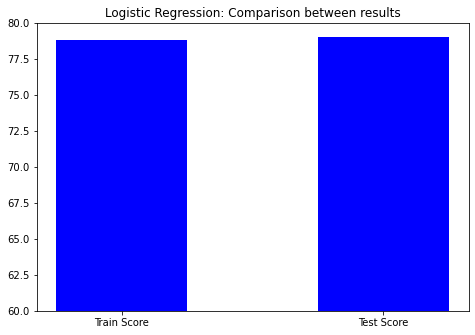

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(60,80)
ax.set_title("Logistic Regression: Comparison between results")
label = ['Train Score', 'Test Score']
data = [lr_trainscore*100,lr_testscore*100]
ax.bar(label,data, color = 'blue', width = 0.5)
plt.show()

### 2. KNN

In [42]:
KNN = KNeighborsClassifier(n_neighbors=25)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [43]:
KNN_trainscore = KNN.score(x_train, y_train)
KNN_testscore = KNN.score(x_test, y_test)
print("KNN Accuracy: ")
print("KNN Train Accuracy: ",KNN_trainscore*100)
print("KNN Test Accuracy: ",KNN_testscore*100)

KNN Accuracy: 
KNN Train Accuracy:  80.35072632904395
KNN Test Accuracy:  80.2837663534181


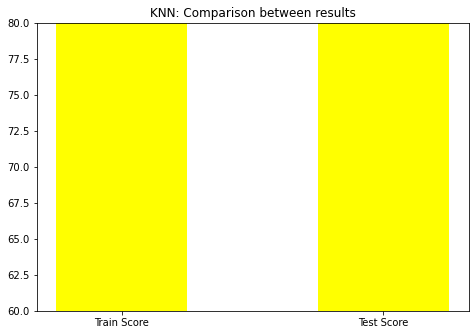

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(60,80)
ax.set_title("KNN: Comparison between results")
label = ['Train Score', 'Test Score']
data = [KNN_trainscore*100,KNN_testscore*100]
ax.bar(label,data, color = 'yellow', width = 0.5)
plt.show()

### 3. Decision Tree

In [45]:
decision_tree = DecisionTreeClassifier(min_impurity_decrease = 0.05)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [46]:
dc_trainscore = decision_tree.score(x_train, y_train)
dc_testscore = decision_tree.score(x_test, y_test)
print("Decision Tree Accuracy: ")
print("DTree Train Accuracy: ",dc_trainscore*100)
print("DTree Test Accuracy: ",dc_testscore*100)

Decision Tree Accuracy: 
DTree Train Accuracy:  75.91904425539757
DTree Test Accuracy:  76.3773723972729


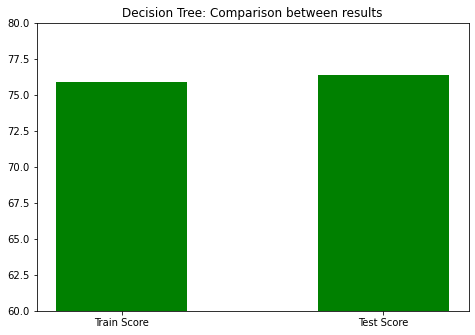

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(60,80)
ax.set_title("Decision Tree: Comparison between results")
label = ['Train Score', 'Test Score']
data = [dc_trainscore*100,dc_testscore*100]
ax.bar(label,data, color = 'green', width = 0.5)
plt.show()

#### Minor differences between Train and Test scores but Test scores seems to be improving in Decision Tree and Logistic Regression.

## Comparison Between Models

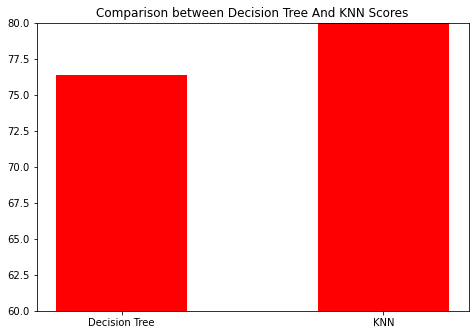

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(60,80)
ax.set_title("Comparison between Decision Tree And KNN Scores")
label = ['Decision Tree', 'KNN']
data = [dc_testscore*100,KNN_testscore*100]
ax.bar(label,data, color = 'red', width = 0.5)
plt.show()